1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [185]:
import numpy as np
import matplotlib.pyplot as plt

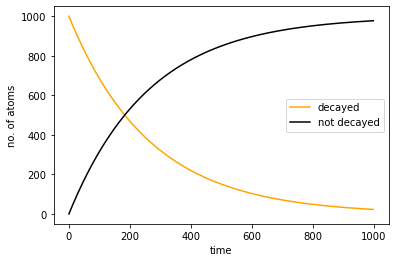

In [186]:
#given values and parameters
tau=183.12 # since we need to take the steps in seconds
n_tl=1000
n_pb=0

def p_t(t):
    return (1-2**(-t/tau))

# print("The probability distribution function p(t) is:",p_t(1))

tl_atoms=[]
pb_atoms=[]

i = 0
# since we start with a sample of 1000 atoms we have to evaluate the possible decay at each step
while(i < n_tl): # since 1000 atoms we will compute for 1000 steps
    probability = p_t(i)
    decay = (1000*probability)
    t_val = n_tl - decay # Subtract the decay from thallium
    p_val = n_pb + decay # add the decay to lead
    tl_atoms.append(t_val) 
    pb_atoms.append(p_val) 
    i += 1 
    
# plotting over one step per second 
t=np.arange(0,1000,1)  
plt.figure()
plt.plot(t, tl_atoms,color="orange",label='decayed')
plt.plot(t, pb_atoms,color="black",label='not decayed')
plt.xlabel('time')
plt.ylabel('no. of atoms')
plt.legend()
plt.show() 

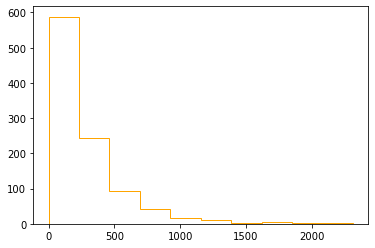

In [187]:
# Repeat the exercise by means of the inverse transform method:
# Draw 1000 random numbers from the non-uniform probability distribution
def new_pt(t): # doing the inverse of the first function p(t) will result in this new_pt function
    return (-tau * np.log2(1-t)) 

#print("The non-uniform probability distribution function p(t) is:",new_pt(2))
# draw 1000 random numbers from the non-uniform probability distribution 
rand_n = np.random.random(1000)
times_of_decay = new_pt(rand_n) # draw 1000 random numbers
plt.hist(times_of_decay, histtype='step',color="orange")
plt.show()
#from the plot we can see the no. of atoms that have not decayed as a function of time

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The Integral is: 1.398
The mean is : 0.695238
The standard deviation is : 0.400364652980255


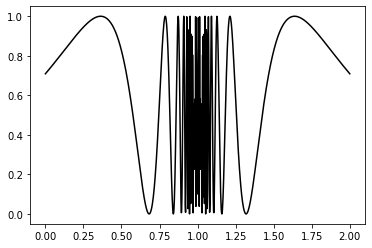

In [188]:
def f(x):
    return (np.sin(1. / (1 - x)))**2

# plotting the function
x = np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'black')
# computing the integral
N = 1000
count = 0
dist_int=[]
for i in range(N):
    x = (2-0) * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): 
        count += 1
    dist_int.append( 2 * count / N)
    
I = 2 * count / N
print("The Integral is:", I)
# evaluating the error
# from the distribution of the integrals taking the mean value and the standard deviation
print("The mean is :",np.mean(dist_int))
print("The standard deviation is :",np.std(dist_int))

In [189]:
# Repeat the integral with the mean value method
x = 2 * np.random.random(N)
int_mean = (2 - 0)*np.sum(f(x)) / N # finding intergral using the mean method
print("Integral using the Mean Value method:", int_mean)
# error of our estimate
#Error of our estimate can be calculated by taking the difference between the 2 methods.
# since both methods are correct , the difference is the error
print("Error:",np.abs(I-int_mean))

Integral using the Mean Value method: 1.2845798129926556
Error: 0.11342018700734435


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [190]:
# area of a circle of unit radius
N = 100000
count=0

def func(x,y):
    if x**2+y**2<=1:
        return 1
    else:
        return 0
    
for i in range(N): 
    x=np.random.random()
    y=np.random.random()
    z=np.random.random()
    if z<=circle(x,y):
        count+=1
        area = ((2**2)*count/N)
        
print('area for a 2D sphere of radius 1 is(2*pi*1): %0.5f'%(area))

area for a 2D sphere of radius 1 is(2*pi*1): 3.13652


In [191]:
#over a 2d sphere with radius one
d=10
count_10=0
for i in range(N):
    s=0
    for j in range(d):
        s+= np.square(np.random.random())
    if s<=1:
        count_10+=1

area_10 = ((2**d)*count_10 /N)
print('result of a 10D sphere : %0.5f'%(area_10))

result of a 10D sphere : 2.53952


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [192]:
#defining the given Integral I
def I(x):
    return (x**(-0.5))/(np.exp(x)+1)
#defining the sampling method
def w(x):
    return 1/(np.sqrt(x))

# calculating the value of the integral
N=100000
a=0
b=1 # given

s = []
for i in range(N):
    x=np.random.uniform(a,b)**2
    s=np.append(s,(I(x)/w(x))) #I(0,....,99999) and w(0,....,99999) will be appended into s
    
I = (2*np.sqrt(b)-2*np.sqrt(a))*(sum(s)/N) #the integral formula
print('Integral with importance sampling method = ', I)

Integral with importance sampling method =  0.8388160180447021
